Social Data Science WS19/20

# Home Assignment 1



Submit your solution via Moodle until 23.59pm on Wednesday, November 6th. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

You can (and should!) submit solutions in teams of up 2-3 members.
Please denote all members of the team with their student id and full name in the notebook. Please submit only one notebook per team. Only submit a notebook, do not submit the dataset(s) you used.

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

##### List team members, including all student IDs here:
1. Wen Sun (391587)
2. Haikun Huang (391180)

## Exploring the Quality of Government Dataset

In this home assignment we are going to explore the 2019 Quality of Government dataset(s) that has been assembled by the QOG institute from University of Gothenburg.
All data as well as documentation can be found here: https://www.qogdata.pol.gu.se/data/

Note that we only consider the data that has been published in January 2019, i.e. the data files that contain the suffix "jan19". Do NOT use any other dataset other than those that can be found in this online repo, except for the data file that we refer to in task 1.

#### Coding guidelines:
* Make sure that your code is executable, any task for which the code does directly not run on our machine will be graded with 0 points.
* In that regard, do not rename the dataset you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `pd.read_csv("qog_file.csv")` instead of `pd.read_csv("C:/User/Path/to/your/Homework/qog_file.csv")` so that the code directly works from our machines.
* Make sure you clean up your code before submission, e.g., properly align your code, and delete every line of code that you do not need anymore, even if you may have experimented with it
* Feel free to use comments in the code. While we do not require them to get full marks, they may help us in case your code has minor errors
* You may create as many additional cells as you want, just make sure that the solutions to the individual tasks can be found near the corresponding assignment.

#### Plotting guidelines:
* For both visualization tasks, you may only create ONE graphic. Thus, if you want to convey much information, think properly about how you can approach this. If you have more than one visualization per task, we will only count the LAST one. You may however use auxiliary plots or textual outputs to illustrate how you came to your final plot. 
* To get full marks for your plots, we require that you consider the principles taught in lecture. In particular, your plot and the message they convey should be easy to understand. No chart-junk. Optimize the data to ink ratio!
* Write a brief summary (<=5 sentences) of your plot in a markdown cell directly below it. 
* Make sure you also pay attention to details such as properly calibrated axes, understandable labels, properly placed legends, etc.

In [1]:
# General preprocessing may go here
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Task 1: Analyzing Life Expectancy (2 pts)

It is widely known that in most countries in Africa, the life expectancy is much lower than in well-developed countries such as Germany. In this first part of the homework, we are looking into this issue.

We are going to investigate differences with respect to continents, and we consider five continents: Africa, Americas, Asia, Europe, Oceania. We use the following reference allocation from countries to continents:  
https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

Note that loading this file into your notebook will also yield the easiest way to add continent information to the QOG data. Again, keep the existing file name "all.csv".

In [2]:
# General preprocessing may go here
data_country = pd.read_csv("all.csv",delimiter=',')
df_country = pd.DataFrame(data_country)
data_qog = pd.read_csv("qog_std_cs_jan19.csv",delimiter=',')
df_qog = pd.DataFrame(data_qog)
df_all = pd.merge(data_qog,df_country,left_on='ccodealp',right_on='alpha-3')

# print(df_all)

#### a) Hypothesis testing (1 pt)
Based on the QOG 2019 data, apply a hypothesis test to show that in African countries, the life expectancy is significantly lower than in European countries. Explicitly state the null hypothesis that you choose, including the test statistic you are using, and explain your approach.

_Use this Markdown cell to formulate your hypothesis and explain your testing procedure._

**_Null hypothesis_** is that the life expectancy in African countries is lower than in European countries.<br>
We use the variable **"ihme_lifexp_allt"** to do the hypothesis testing.<br>
Because this variable means the life expectancy of males and females in all ages.<br>
We compute the corresponding p-value by shuffling the class labels **['ihme_lifexp_allt']** 100000 times and computing the difference in means each of these times.<br>
The solution = life expectancy in Africa is significantly lower than in European<br>

In [3]:
# Code to a) goes here
# null hypothesis is that the life expectancy in African countries is lower than in European countries. 
# We use the variable "ihme_lifexp_allt" to do the hypothesis testing.
# Because this variable means the life expectancy of males and females in all ages.
df_africa = df_all.loc[df_all.loc[:,"region"] == "Africa"]
df_europe = df_all.loc[df_all.loc[:,"region"] == "Europe"]

mean_africa = df_africa.ihme_lifexp_allt.mean()
mean_europe = df_europe.ihme_lifexp_allt.mean()

mean_diff = mean_africa - mean_europe
print(np.abs(mean_diff))

col_africa = df_africa.dropna(axis=0, how='any', subset=['ihme_lifexp_allt'])['ihme_lifexp_allt'].to_numpy()
col_europe = df_europe.dropna(axis=0, how='any', subset=['ihme_lifexp_allt'])['ihme_lifexp_allt'].to_numpy()

ct = 0
for i in range(100000):
    np.random.shuffle(col_africa)
    np.random.shuffle(col_europe)
    diff = np.mean(col_africa[:int(len(col_africa)/30)]) - np.mean(col_europe[:int(len(col_europe)/30)])
    if diff < 0:
        ct+=1
p_value = ct/100000

print("Empirical p-value: " + str(p_value))

if p_value < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

14.826243655555551
Empirical p-value: 0.97827
we accept null hypothesis


#### b) Visualization  (1 pt):
We now consider the life expectancies over all continents. Create an informative visualization that points out how the life expectancies over all five continents differ.

50% baseline: Plotting life expectancy means by continent against each other.

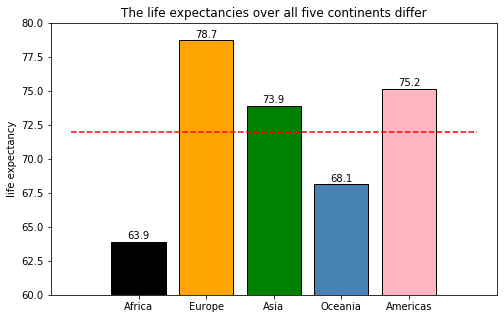

In [4]:
# Code to b) goes here

df_asia = df_all.loc[df_all.loc[:,"region"] == "Asia"]
df_oceania = df_all.loc[df_all.loc[:,"region"] == "Oceania"]
df_americas = df_all.loc[df_all.loc[:,"region"] == "Americas"]

# col_asia = df_asia.dropna(axis=0, how='any', subset=['who_let'])['who_let'].to_numpy()
# col_oceania = df_oceania.dropna(axis=0, how='any', subset=['who_let'])['who_let'].to_numpy()
# col_americas = df_americas.dropna(axis=0, how='any', subset=['who_let'])['who_let'].to_numpy()

plt.figure(figsize=(8, 5))
name_list = ['Africa','Europe','Asia','Oceania','Americas']
num_list = [df_africa.ihme_lifexp_allt.mean(),df_europe.ihme_lifexp_allt.mean(),df_asia.ihme_lifexp_allt.mean(),df_oceania.ihme_lifexp_allt.mean(),df_americas.ihme_lifexp_allt.mean()]
plt.bar(range(len(num_list)),num_list,color=['black', 'orange', 'green', 'steelblue', 'lightpink'],tick_label=name_list,edgecolor='black')
plt.ylim(60, 80)
plt.ylabel('life expectancy')
plt.title('The life expectancies over all five continents differ')
plt.hlines(np.mean(num_list),-1,5, colors = "r", linestyle='--')
for x,y in enumerate(num_list):
    plt.text(x,y+0.2,'%s' %round(y,1),ha='center')

plt.show()

_Description of your plot, consisting of up to 5 sentences may go here_

We draw five histograms with five continents such as Africa, Europe, Asia, Oceania and Americas.<br>
Every histogram has different color in order to be easy to distinguish.<br>
The accurate value of life expectancie is over each histogram.<br>
The red line is the average life expectancie of five continents.<br>

### Task 2: Investigating Corruption (3 pts)

In this second part, we focus on corruption as measured by the _Bayesian Corruption Indicator (BCI)_ (Column bci_bci). 
Explore the data for factors that correlate with corruption, and visualize your findings.  
__Note__: you may NOT consider correlations with other columns that explicitly measure corruption.

50% Baseline: Plotting values from one other column in the data against the BCI in a properly designed plot, where some correlation becomes apparent.

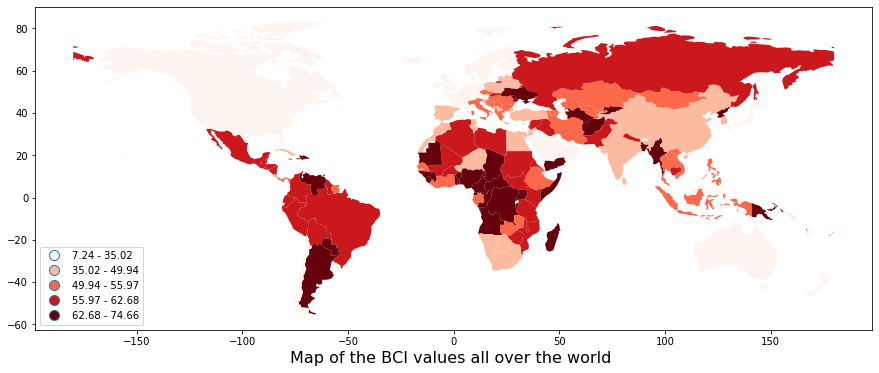

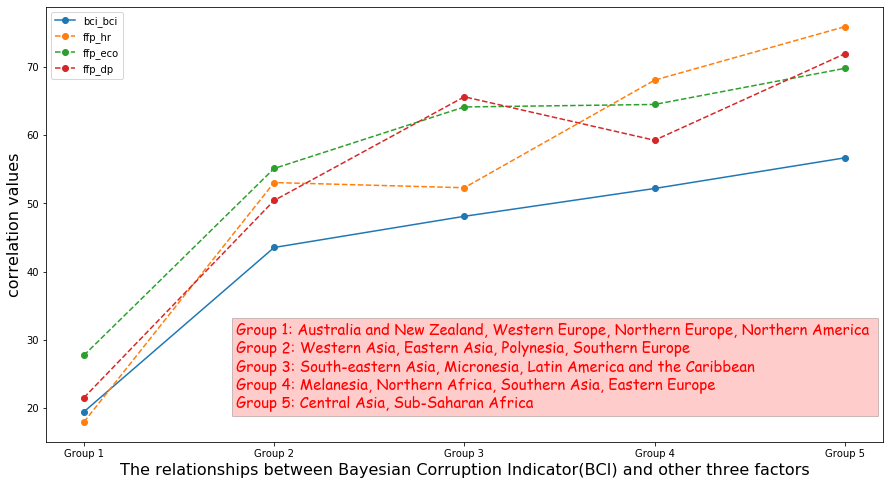

In [22]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

df_all_world = pd.merge(df_all,world,left_on='alpha-3',right_on='iso_a3')

df_all_bci = df_all_world.dropna(axis=0, how='any', subset=['bci_bci'])

gdf = geopandas.GeoDataFrame(df_all_bci)

fig, ax = plt.subplots(1, figsize=(15, 8))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# gdf.plot(column='bci_bci', ax=ax, legend=True, cax=cax)

gdf.plot(column='bci_bci',cmap='Reds',ax=ax, scheme='quantiles', legend=True, legend_kwds={'loc': 'lower left'}) #OrRd
plt.xlabel("Map of the BCI values all over the world ",fontsize=16)
##################################################################################################################################

df_all = pd.merge(data_qog,df_country,left_on='ccodealp',right_on='alpha-3')

sub_region = ['Sub-Saharan Africa','Latin America and the Caribbean','Western Asia','Southern Europe','South-eastern Asia','Northern Europe','Eastern Europe','Western Europe','Southern Asia','Eastern Asia','Northern Africa','Micronesia','Central Asia','Melanesia','Polynesia','Northern America','Australia and New Zealand']
col=['bci_bci','ffp_hr','ffp_eco','ffp_dp']

df_corr = pd.DataFrame(np.zeros(len(sub_region)*len(col)).reshape(len(sub_region),len(col)),index=sub_region,columns=col)
for i in sub_region:
    for temp_val in col:
        df_sub_region = df_all.loc[df_all.loc[:,"sub-region"] == i]
        col_sub_region = df_sub_region.dropna(axis=0, how='any', subset=[temp_val])[temp_val].to_numpy()
        df_corr.loc[i,temp_val] = np.mean(col_sub_region)

df_corr = df_corr.sort_values(by=['bci_bci'])

sub_group = ['Group 1','Group 2','Group 3','Group 4','Group 5']
# The sub-region has been divided into 5 groups, as follows:
# Group 1: Australia and New Zealand, Western Europe, Northern Europe, Northern America
# Group 2: Western Asia, Eastern Asia, Polynesia, Southern Europe
# Group 3: South-eastern Asia, Micronesia, Latin America and the Caribbean
# Group 4: Melanesia, Northern Africa, Southern Asia, Eastern Europe
# Group 5: Central Asia, Sub-Saharan Africa

df_corr_group = pd.DataFrame(np.zeros(len(sub_group)*len(col)).reshape(len(sub_group),len(col)),index=sub_group,columns=col)

df_corr_1 = df_corr.iloc[0:4, 0:5]
for temp_val in col:
    df_corr_group.loc[sub_group[0],temp_val] = df_corr_1.mean()[temp_val]
    
df_corr_2 = df_corr.iloc[4:8, 0:5]
for temp_val in col:
    df_corr_group.loc[sub_group[1],temp_val] = df_corr_2.mean()[temp_val]

df_corr_3 = df_corr.iloc[8:11, 0:5]
for temp_val in col:
    df_corr_group.loc[sub_group[2],temp_val] = df_corr_3.mean()[temp_val]

df_corr_4 = df_corr.iloc[11:15, 0:5]
for temp_val in col:
    df_corr_group.loc[sub_group[3],temp_val] = df_corr_4.mean()[temp_val]

df_corr_5 = df_corr.iloc[15:, 0:5]
for temp_val in col:
    df_corr_group.loc[sub_group[4],temp_val] = df_corr_5.mean()[temp_val]

plt.figure(figsize=(15,8))
plt.plot(df_corr_group['bci_bci'],label='bci_bci', marker='o')
plt.plot(df_corr_group['ffp_hr']*10,label='ffp_hr', marker='o',linestyle='--')
plt.plot(df_corr_group['ffp_eco']*10,label='ffp_eco', marker='o',linestyle='--')
plt.plot(df_corr_group['ffp_dp']*10,label='ffp_dp', marker='o',linestyle='--')

text = "Group 1: Australia and New Zealand, Western Europe, Northern Europe, Northern America \n" \
       "Group 2: Western Asia, Eastern Asia, Polynesia, Southern Europe \n" \
       "Group 3: South-eastern Asia, Micronesia, Latin America and the Caribbean \n" \
       "Group 4: Melanesia, Northern Africa, Southern Asia, Eastern Europe \n" \
       "Group 5: Central Asia, Sub-Saharan Africa"
        

plt.text(0.8, 20, text, size = 15,\
         family = "fantasy", color = "r", style = "italic", weight = "light",\
         bbox = dict(facecolor = "r", alpha = 0.2))


plt.xlabel("The relationships between Bayesian Corruption Indicator(BCI) and other three factors",fontsize=16)
plt.ylabel("correlation values",fontsize=16)
plt.legend()
plt.show()

_Description of your plot, consisting of up to 5 sentences may go here_

We draw the line graph with 4 curves, such as the BCI values and the other three factors that correlate with corruption and according to the map graph we divide all regions into 5 groups.

From the graph we can see clealy all the curves are proportional to BCI values and these three indexs belong to Fragile States Index, which can identity when those pressures are pushing a sub-region towards the brink of failure.

The yellow curve **"ffp_hr"** represents **the pressures from human rights** and shows that if human rights are unevenly protected in countries, they have high level of corruption.

The green curve **"ffp_eco"** represents **the degree of economic decline** and depicts that the countries with more economic decline, they have the higher the degree of corruption.

The red curve **"ffp_dp"** means **pressures on the population** and illustrates that if the countries have lower population growth, there are high degree of corruption in these countries.
